In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from config import Config
from experiments_utils import *

/home/vkolhatk/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
training_feats_file = Config.TRAIN_PATH + 'SOCC_nyt_ync_features.csv'

In [3]:
training_feats_file = Config.TRAIN_PATH + 'SOCC_nyt_ync_features.csv'

In [4]:
training_feats_df = pd.read_csv(training_feats_file)

In [5]:
SOCC_df = training_feats_df[training_feats_df['source'].isin(['SOCC'])]

In [9]:
data_sources = ['SOCC', 
                #'NYTPicks+YNACC', 
                #'SOCC+NYTPicks+YNACC', 
                #'SOCC+NYTPicks'
               ]        

In [14]:
feature_sets = ['text_feats', 
                'length_feats',
                'argumentation_feats',
                'COMMENTIQ_feats',
                'named_entity_feats',
                'constructiveness_chars_feats',
                'non_constructiveness_chars_feats',
                'toxicity_chars_feats'
               ]

In [ ]:
print('The best feature combinations: ', find_best_features(SOCC_df, feature_sets))

Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )


# Find correlation of each feature column with the target column 

In [18]:
SOCC_df.columns

Index(['pp_comment_text', 'constructive', 'source',
       'has_conjunctions_and_connectives', 'has_stance_adverbials',
       'has_reasoning_verbs', 'has_modals', 'has_shell_nouns', 'length',
       'average_word_length', 'readability_score', 'personal_exp_score',
       'named_entity_count', 'nSents', 'avg_words_per_sent', 'specific_points',
       'dialogue', 'no_con', 'evidence', 'personal_story', 'solution',
       'no_respect', 'no_non_con', 'provocative', 'noncon_other', 'sarcastic',
       'non_relevant', 'unsubstantial', 'personal_attack', 'teasing',
       'no_toxic', 'abusive', 'toxic_other', 'embarrassment', 'inflammatory'],
      dtype='object')

In [19]:
features = ['has_conjunctions_and_connectives', 'has_stance_adverbials',
       'has_reasoning_verbs', 'has_modals', 'has_shell_nouns', 'length',
       'average_word_length', 'readability_score', 'personal_exp_score',
       'named_entity_count', 'nSents', 'avg_words_per_sent', 'specific_points',
       'dialogue', 'no_con', 'evidence', 'personal_story', 'solution',
       'no_respect', 'no_non_con', 'provocative', 'noncon_other', 'sarcastic',
       'non_relevant', 'unsubstantial', 'personal_attack', 'teasing',
       'no_toxic', 'abusive', 'toxic_other', 'embarrassment', 'inflammatory']

Feature:  has_conjunctions_and_connectives
Correlation:  0.24669337097866414
-----------------
Feature:  has_stance_adverbials
Correlation:  0.3044504716668109
-----------------
Feature:  has_reasoning_verbs
Correlation:  0.3862482756150016
-----------------
Feature:  has_modals
Correlation:  0.414188038875005
-----------------
Feature:  has_shell_nouns
Correlation:  0.33157941865505
-----------------
Feature:  length
Correlation:  0.6229550807141968
-----------------
Feature:  average_word_length
Correlation:  -0.04114168880753566
-----------------
Feature:  readability_score
Correlation:  0.7219889433538611
-----------------
Feature:  personal_exp_score
Correlation:  -0.02549702732585633
-----------------
Feature:  named_entity_count
Correlation:  0.5289503661720035
-----------------
Feature:  nSents
Correlation:  0.5335967583909184
-----------------
Feature:  avg_words_per_sent
Correlation:  0.35086588420616754
-----------------
Feature:  specific_points
Correlation:  0.430853996580

/home/vkolhatk/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Correlation:  -0.12031180446368409
-----------------
Feature:  noncon_other
Correlation:  nan
-----------------
Feature:  sarcastic
Correlation:  -0.0971409097861506
-----------------
Feature:  non_relevant
Correlation:  -0.4302867674350587
-----------------
Feature:  unsubstantial
Correlation:  -0.46515826624672246
-----------------
Feature:  personal_attack
Correlation:  -0.03275557139520902
-----------------
Feature:  teasing
Correlation:  -0.0426139069128108
-----------------
Feature:  no_toxic
Correlation:  0.03225095655938979
-----------------
Feature:  abusive
Correlation:  -0.03742343791689194
-----------------
Feature:  toxic_other
Correlation:  nan
-----------------
Feature:  embarrassment
Correlation:  -0.008898645524256886
-----------------
Feature:  inflammatory
Correlation:  -0.010749803760354788
-----------------


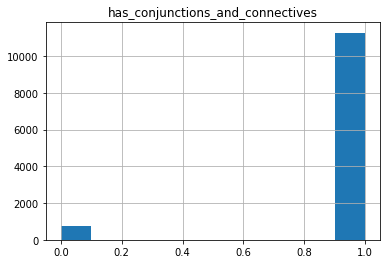

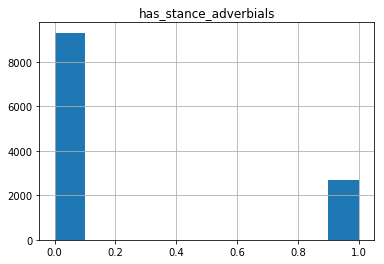

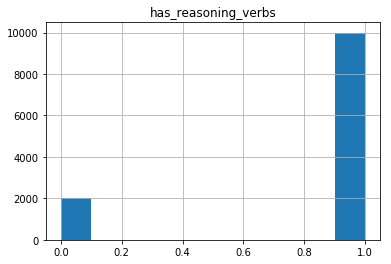

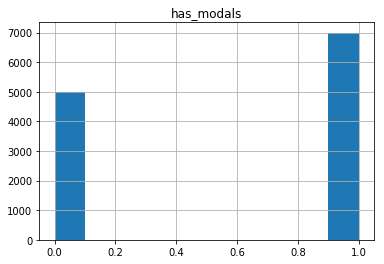

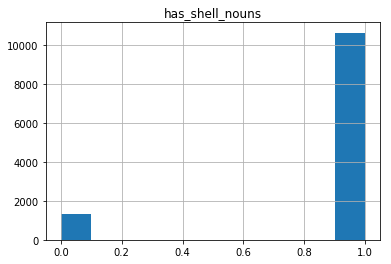

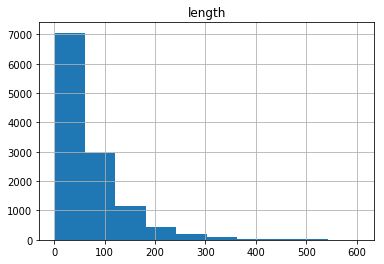

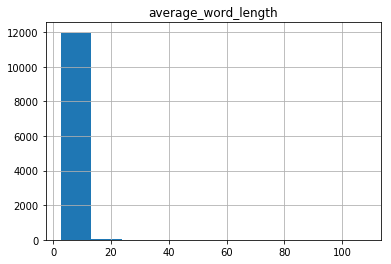

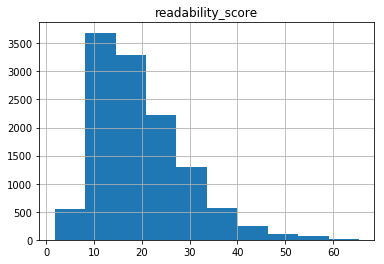

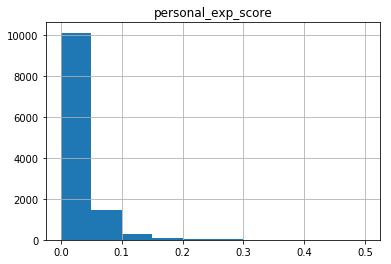

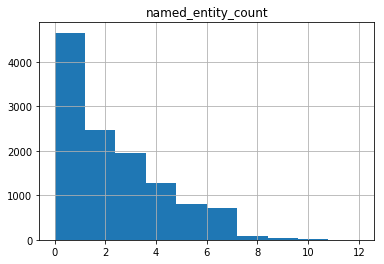

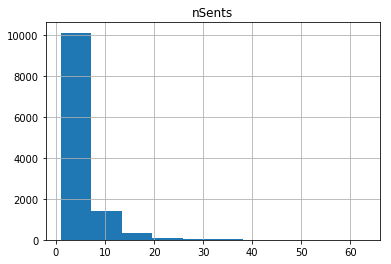

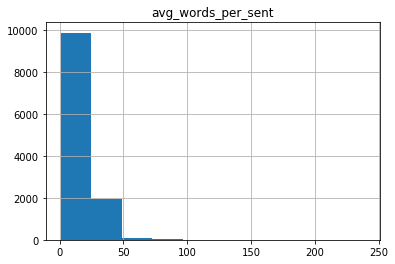

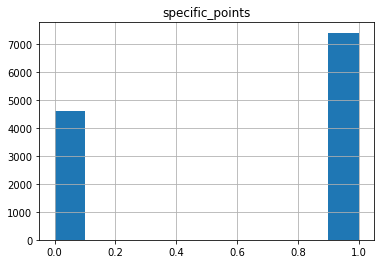

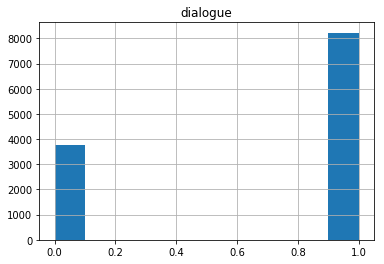

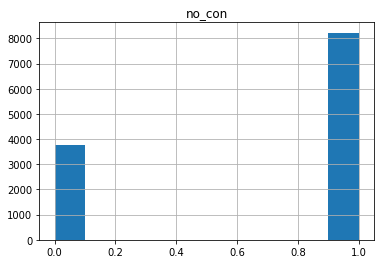

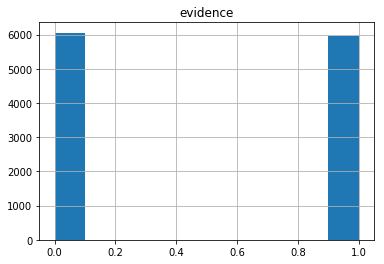

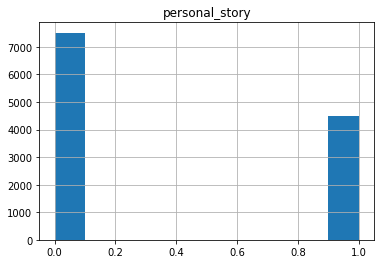

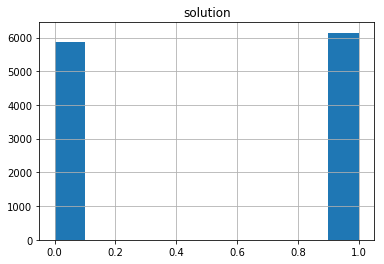

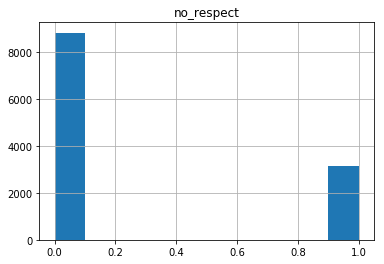

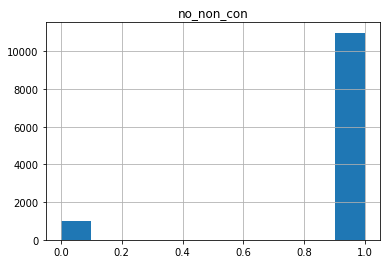

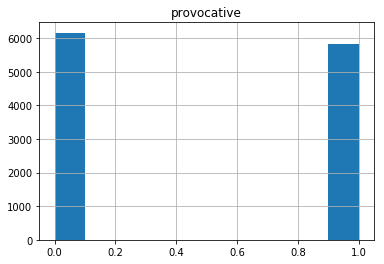

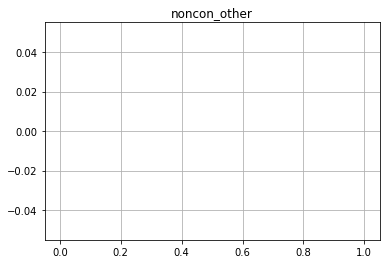

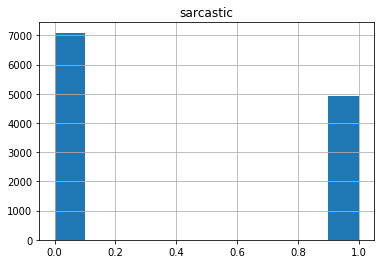

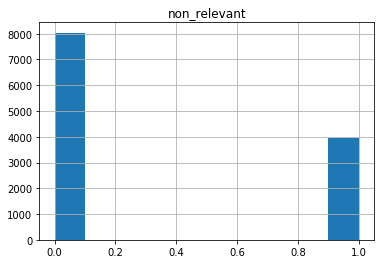

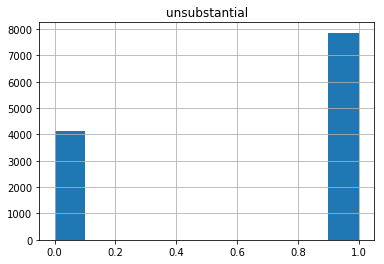

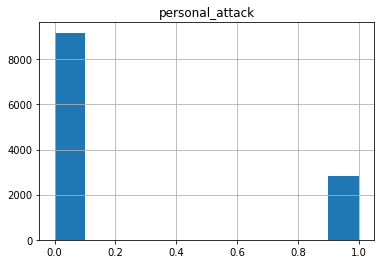

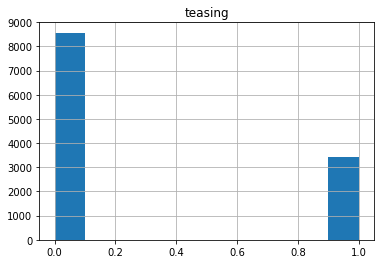

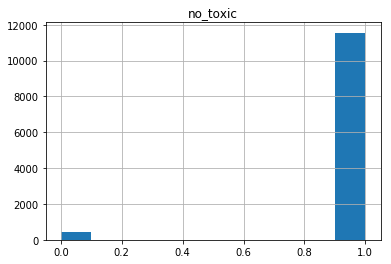

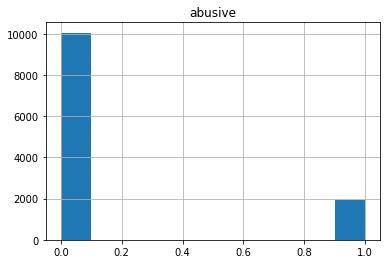

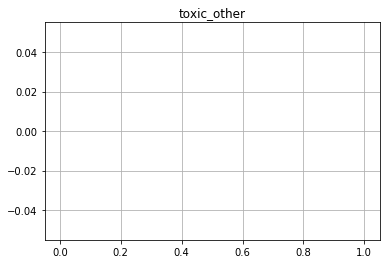

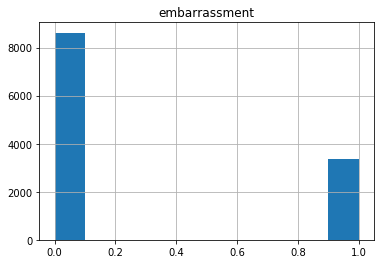

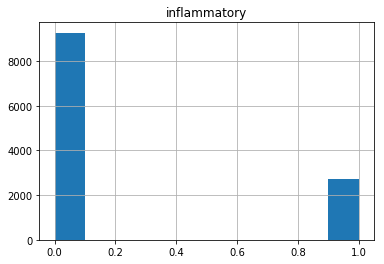

In [21]:
for feat in features: 
    print('Feature: ', feat)
    SOCC_df.hist(feat)
    print('Correlation: ', SOCC_df['constructive'].corr(SOCC_df[feat]))
    print('-----------------')

In [23]:
#SOCC_df.corr(method='pearson')

In [5]:
for data_source in data_sources:
    print('Data source: ', data_source) 
    sources = data_source.split('+')

    if data_source.startswith('SOCC+NYTPicks'):
        # sample negative examples from SOCC and the same number of +ve examples from NYTPicks
        subset_df = training_feats_df[training_feats_df['source'].isin(sources)]
        SOCC_neg_df = subset_df[(subset_df['source'] == 'SOCC') & (subset_df['constructive'] == 0)]
        NYTPicks_df = subset_df[(subset_df['source'] == 'NYTPicks')]                        
        NYTPicks_df_sample = NYTPicks_df.sample(n = SOCC_neg_df.shape[0])
        train_df = pd.concat([SOCC_neg_df, NYTPicks_df_sample])    
    else:             
        train_df = training_feats_df[training_feats_df['source'].isin(sources)]        

    feature_set = ['text_feats']        
    print('Cross-validation results: ', run_cross_validation_experiments(train_df, feature_set))
    #save_path = data_source + '.png'
    #run_training_size_experiments(train_df, save_path)

    print('\n----------------------------\n')          

Data source:  SOCC
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'variance': 7.98221165213992e-05, 'scores': array([0.75234131, 0.74479167, 0.76145833, 0.73125   , 0.746875  ,
       0.74791667, 0.73125   , 0.75104167, 0.74375   , 0.73826903]), 'mean_score': 0.7448943674707401}

----------------------------

